In [1]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.API import update_Cal_IPC
from ATS.general import *
from ATS.QAQC import *

# Set the DataFram in pandas to show all columns and 500 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)

2021-12-14 18:54:21.205602: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-14 18:54:21.205654: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
service_id = 'f6194c9524bf455d88cab06703e767a5'

# Update Cal IPC Rating column

<Item title:"SAC_NNIP" type:Feature Layer Collection owner:Anooshi>
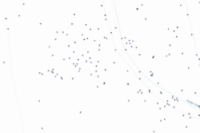

Current Plant Species List file location:
/home/user/SAC/Script Support Files/SAC Master Plant Species List 20191114.xlsx
Current Sheet Name:
Year 5 Plant Species List


Successfully updated features


In [3]:
update_Cal_IPC(service_id,'Cal_IPC_Rating','Species_Sci',layer=0)

# Load data, merge, subset

<Item title:"SAC_NNIP" type:Feature Layer Collection owner:Anooshi>
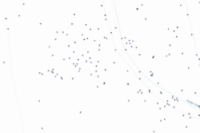

In [4]:
# Load data from arcGIS online for excel export
output = arcGIS_data_load(service_id)

points = output['data0']
mapping = output['table1']
feature_service = output['feature_service']

In [5]:
# Merge related table and feature layer
data = points.merge(mapping, left_on='GlobalID', right_on='Ref_to_Points', how='inner')
data = data.drop(columns=['GlobalID_x','Cover_x','Comments_x','Ref_to_Points'])
data = data.rename(columns={'Cover_y':'Cover','GlobalID_y':'Record_GlobalID','OBJECTID_x':'Point_ID','OBJECTID_y':'Record_ID','Comments_y':'Comments'})

In [6]:
len(data)

1303

In [7]:
# Subset by year
sYear = input("Start Year? (YYYY)")
sub = year_subset(data, sYear)

Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 243


# QAQC

In [8]:
validate_domains(feature_service)



Table/Layer:  NNIP_Management


The following entries are not within the domain:


,Field,Data
0,Surveyor_1,"{Richard Graham-Bruno, Janel Mayo}"
0,Surveyor_2,"{, Richard Graham-Bruno, Janel Mayo}"
0,Cover,"{, 26-50, 1-25, 0-1, 51-75}"
0,Herbicide,{}
0,Contrator,{}
0,Treatment_Rec_Action,{}
0,Population_Size,{}




Table/Layer:  NNIP_Mapping


The following entries are not within the domain:


,Field,Data
0,Surveyor_1,"{Ryan Swanson, Jackson Sabol, Richard Graham-Bruno, Joy Stewart, Janel Mayo}"
0,Surveyor_2,"{, Ryan Swanson, Jackson Sabol, Richard Graham-Bruno, Joy Stewart, Janel Mayo}"
0,Phenology,{Unknown}
0,Cover,"{26-50, Unknown, 1-25, 0-1, 51-75, 76-100}"
0,Pop_Size,{Unknown}
0,Patch_Shape,{}
0,Int_Dist,{Unknown}
0,Field_Season,{}




Table/Layer:  NNIP_Monitoring


The following entries are not within the domain:


,Field,Data
0,Surveyor_1,"{Ryan Swanson, Richard Graham-Bruno, Janel Mayo}"
0,Surveyor_2,"{Ryan Swanson, Richard Graham-Bruno, Janel Mayo}"




Table/Layer:  NNIP_Monitoring_Observations


No Mismatches Found


Table/Layer:  Points


The following entries are not within the domain:


,Field,Data
0,Species_Sci,"{, Willow - Tree Protection, Thatch, Salix laevigata, Salix gooddingii, Salix exigua}"
0,Deprecated,{}


In [9]:
QAQC_whitespace(data, exclude_cols=['Comments','Comments_y','Comments_x'],objectID=['Record_ID'] )



Analysis for: Patch_Shape
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Pop_Size
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Record_GlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: ESRIGNSS_RECEIVER
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Phenology
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Int_Dist
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Species_Sci
No \xa0 characters found
No double spaces found
No triple spaces fou

In [10]:
# QAQC Find blank entries
find_blank_entries(data, exclude_cols=['Comments','Surveyor_2','ESRIGNSS_H_RMS','ESRIGNSS_AVG_H_RMS','ESRIGNSS_RECEIVER','Estimated_Area_sqft','Patch_Shape','Field_Season'])

No blank Pop_Size
No blank Species_Sci
No blank Record_ID
No blank Record_GlobalID
No blank Deprecated
No blank Cover
No blank Phenology
No blank Int_Dist
No blank SHAPE
No blank BHR_Site
No blank Point_ID
No blank Surveyor_1
No blank Cal_IPC_Rating
No blank Observation_Date


In [11]:
data.columns

Index(['Point_ID', 'Species_Sci', 'Cal_IPC_Rating', 'BHR_Site', 'Deprecated',
       'ESRIGNSS_RECEIVER', 'ESRIGNSS_H_RMS', 'ESRIGNSS_AVG_H_RMS', 'SHAPE',
       'Record_ID', 'Observation_Date', 'Surveyor_1', 'Surveyor_2',
       'Phenology', 'Cover', 'Pop_Size', 'Patch_Shape', 'Int_Dist', 'Comments',
       'Record_GlobalID', 'Field_Season', 'Estimated_Area_sqft'],
      dtype='object')

/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


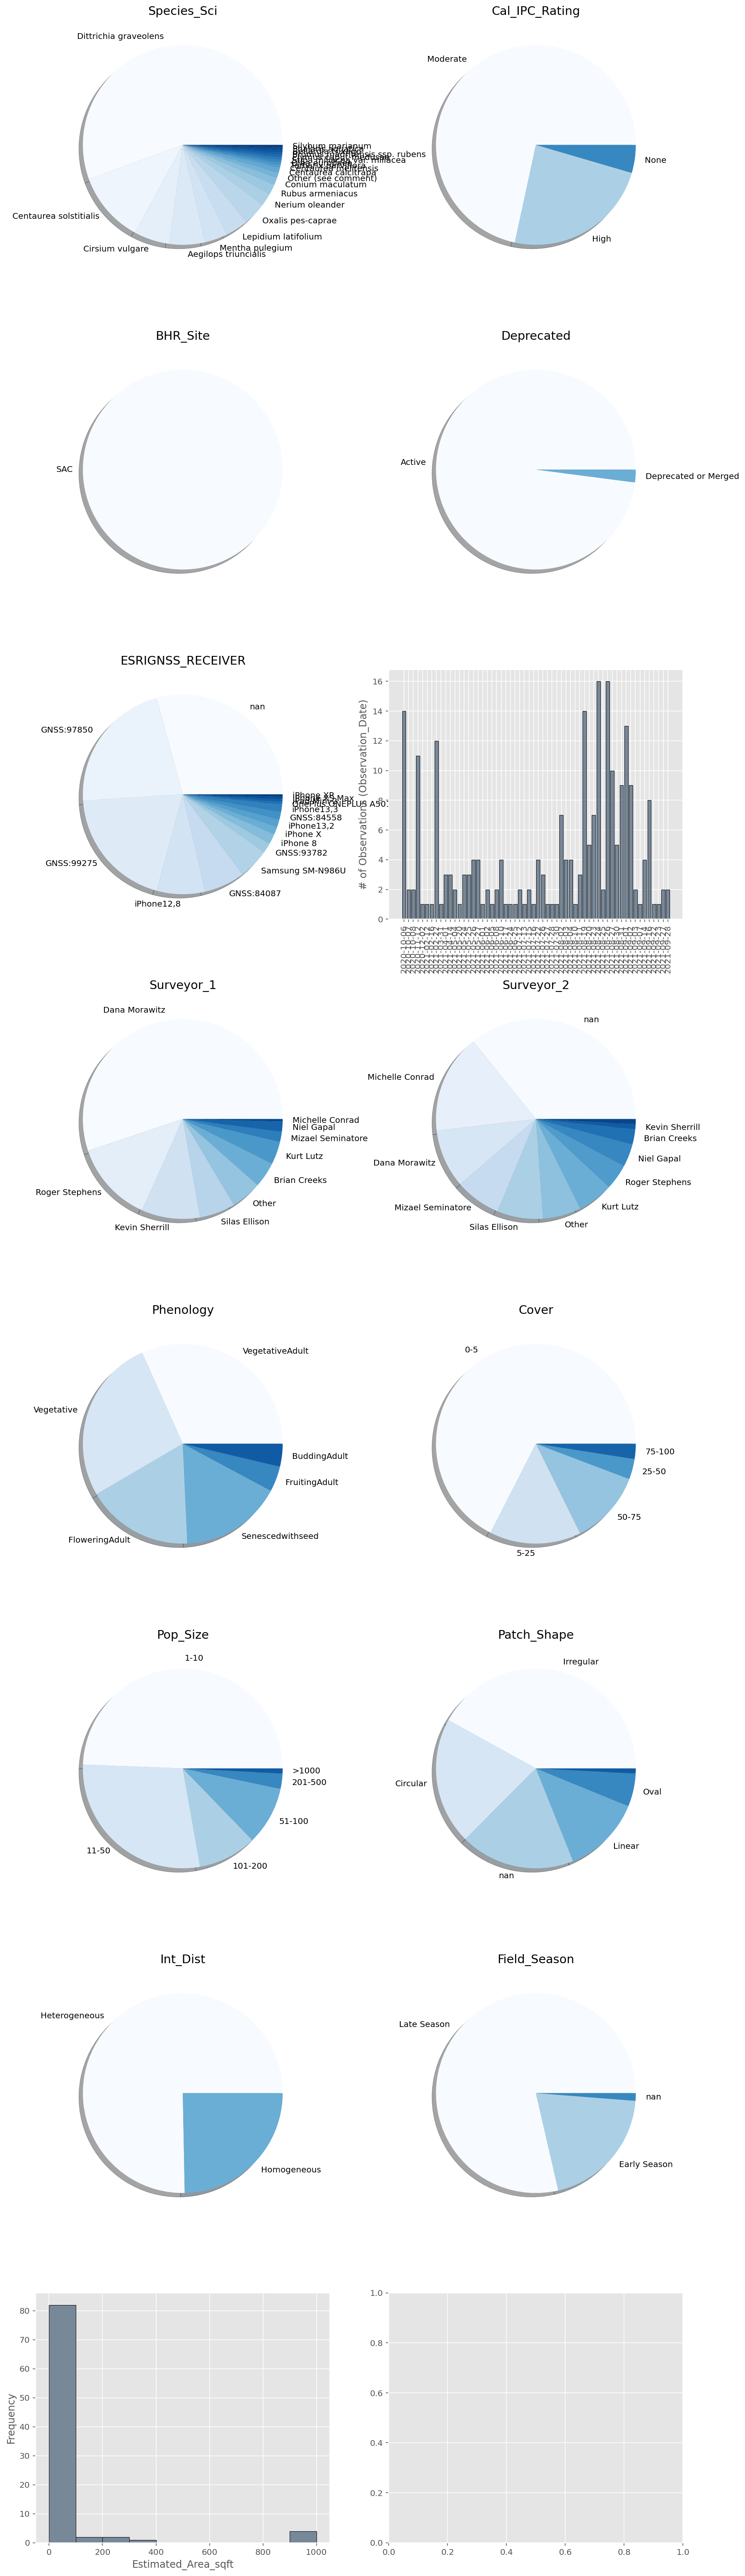

In [12]:
QAQC_plot(sub, [ 'Species_Sci', 'Cal_IPC_Rating', 'BHR_Site', 'Deprecated',
       'ESRIGNSS_RECEIVER',
       'Observation_Date', 'Surveyor_1', 'Surveyor_2',
       'Phenology', 'Cover', 'Pop_Size', 'Patch_Shape', 'Int_Dist',
       'Field_Season', 'Estimated_Area_sqft'])

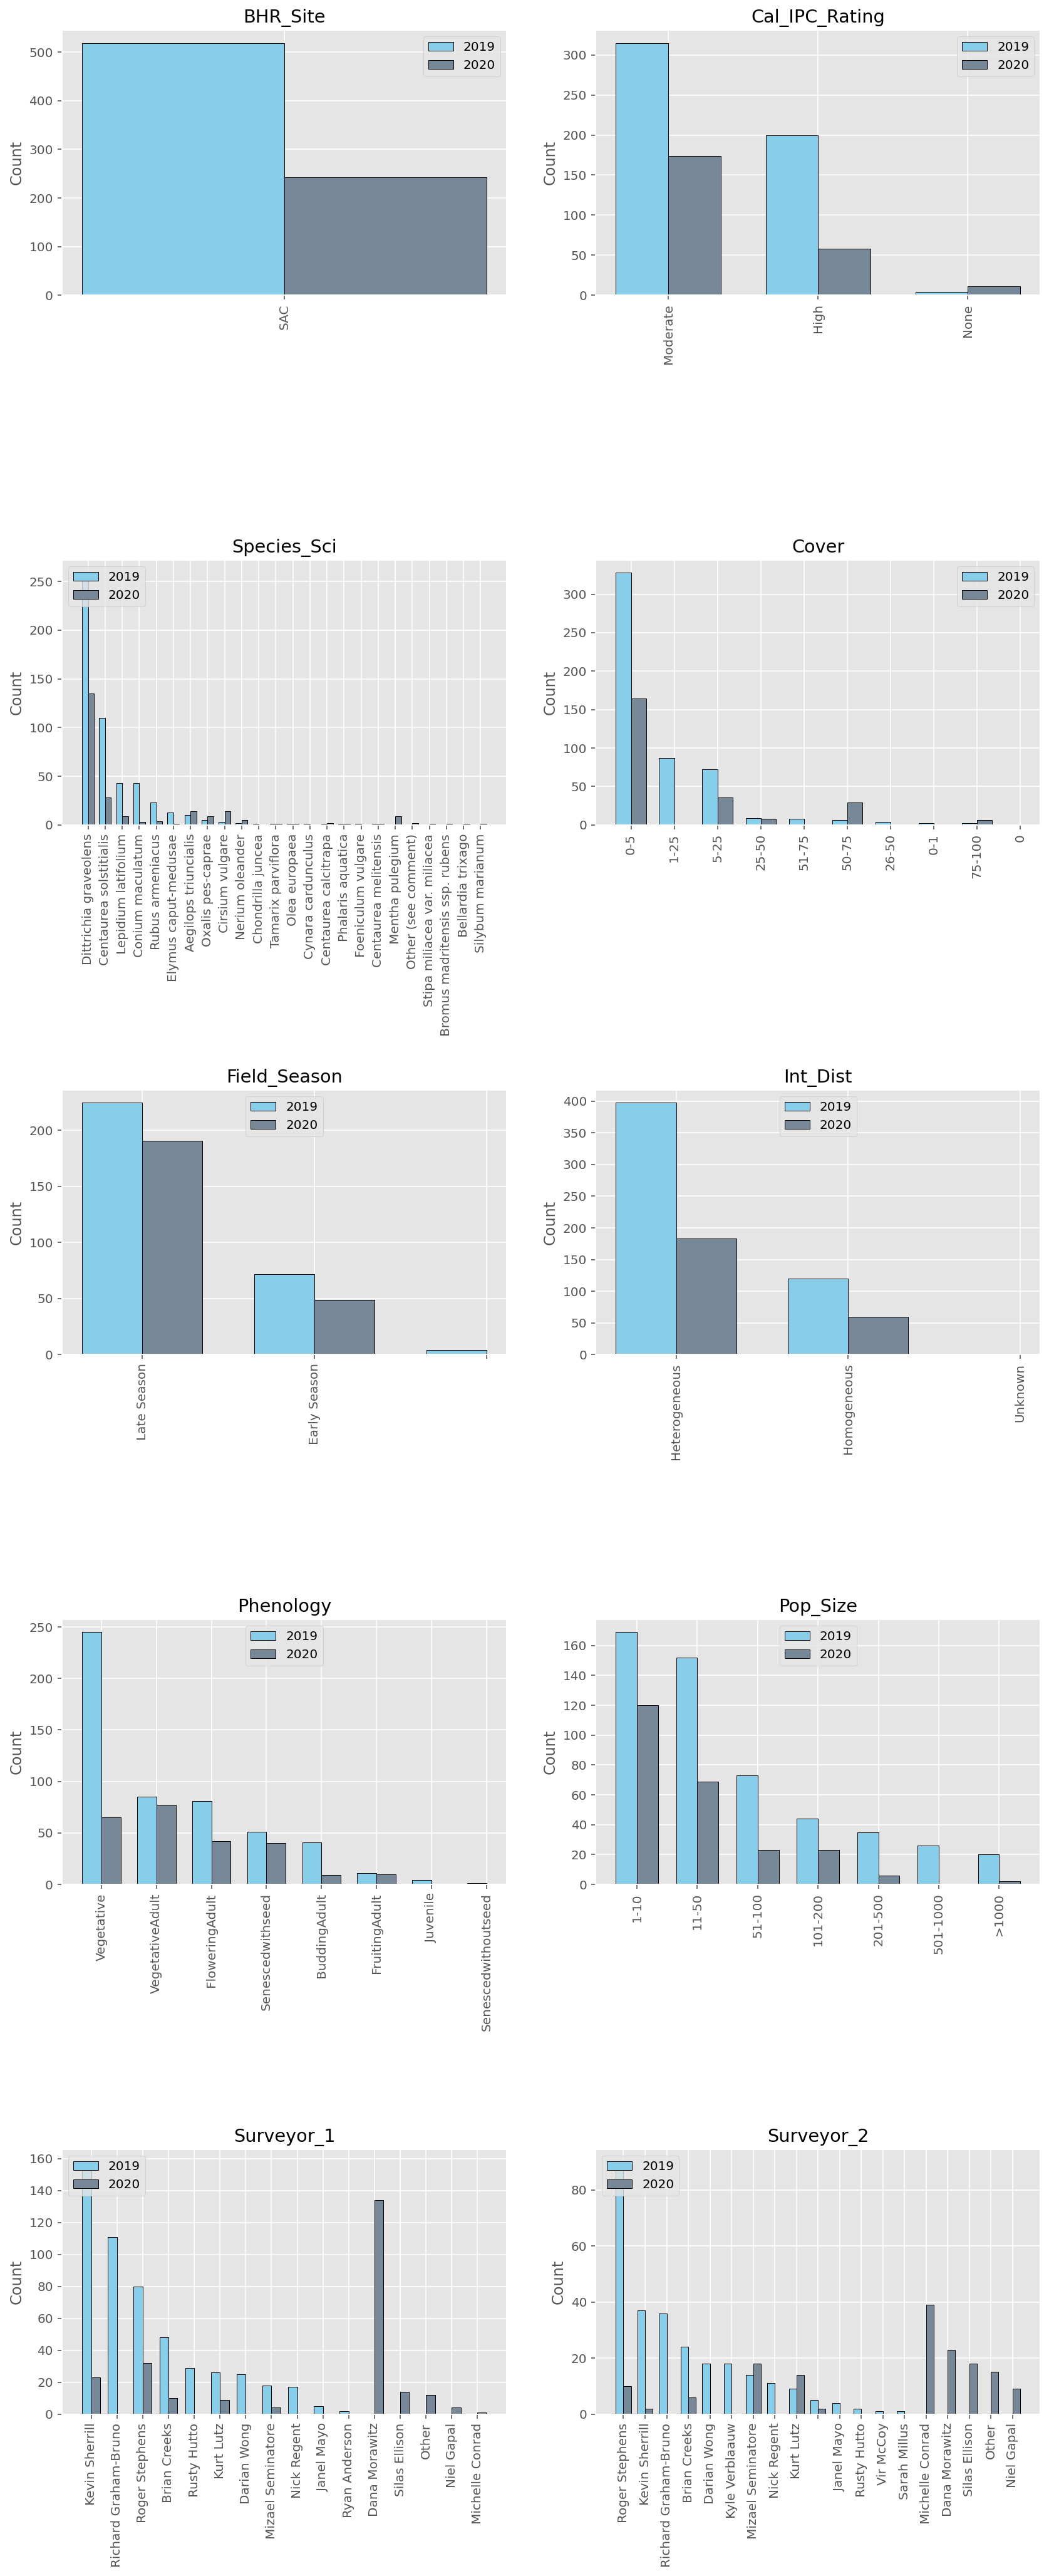

In [13]:
# Plot data for comparison between years
compare_years_catagorical(data, ['BHR_Site', 'Cal_IPC_Rating',  'Species_Sci', 
       'Cover', 'Field_Season', 'Int_Dist', 
         'Phenology', 'Pop_Size',
        'Surveyor_1', 'Surveyor_2'], '2019','2020')

Dropping surveyors with less than 12.15 observations
They did not make over 5% of total observation
Dropping Surveyors: ['Other' 'Brian Creeks' 'Kurt Lutz' 'Mizael Seminatore' 'Niel Gapal'
 'Michelle Conrad']


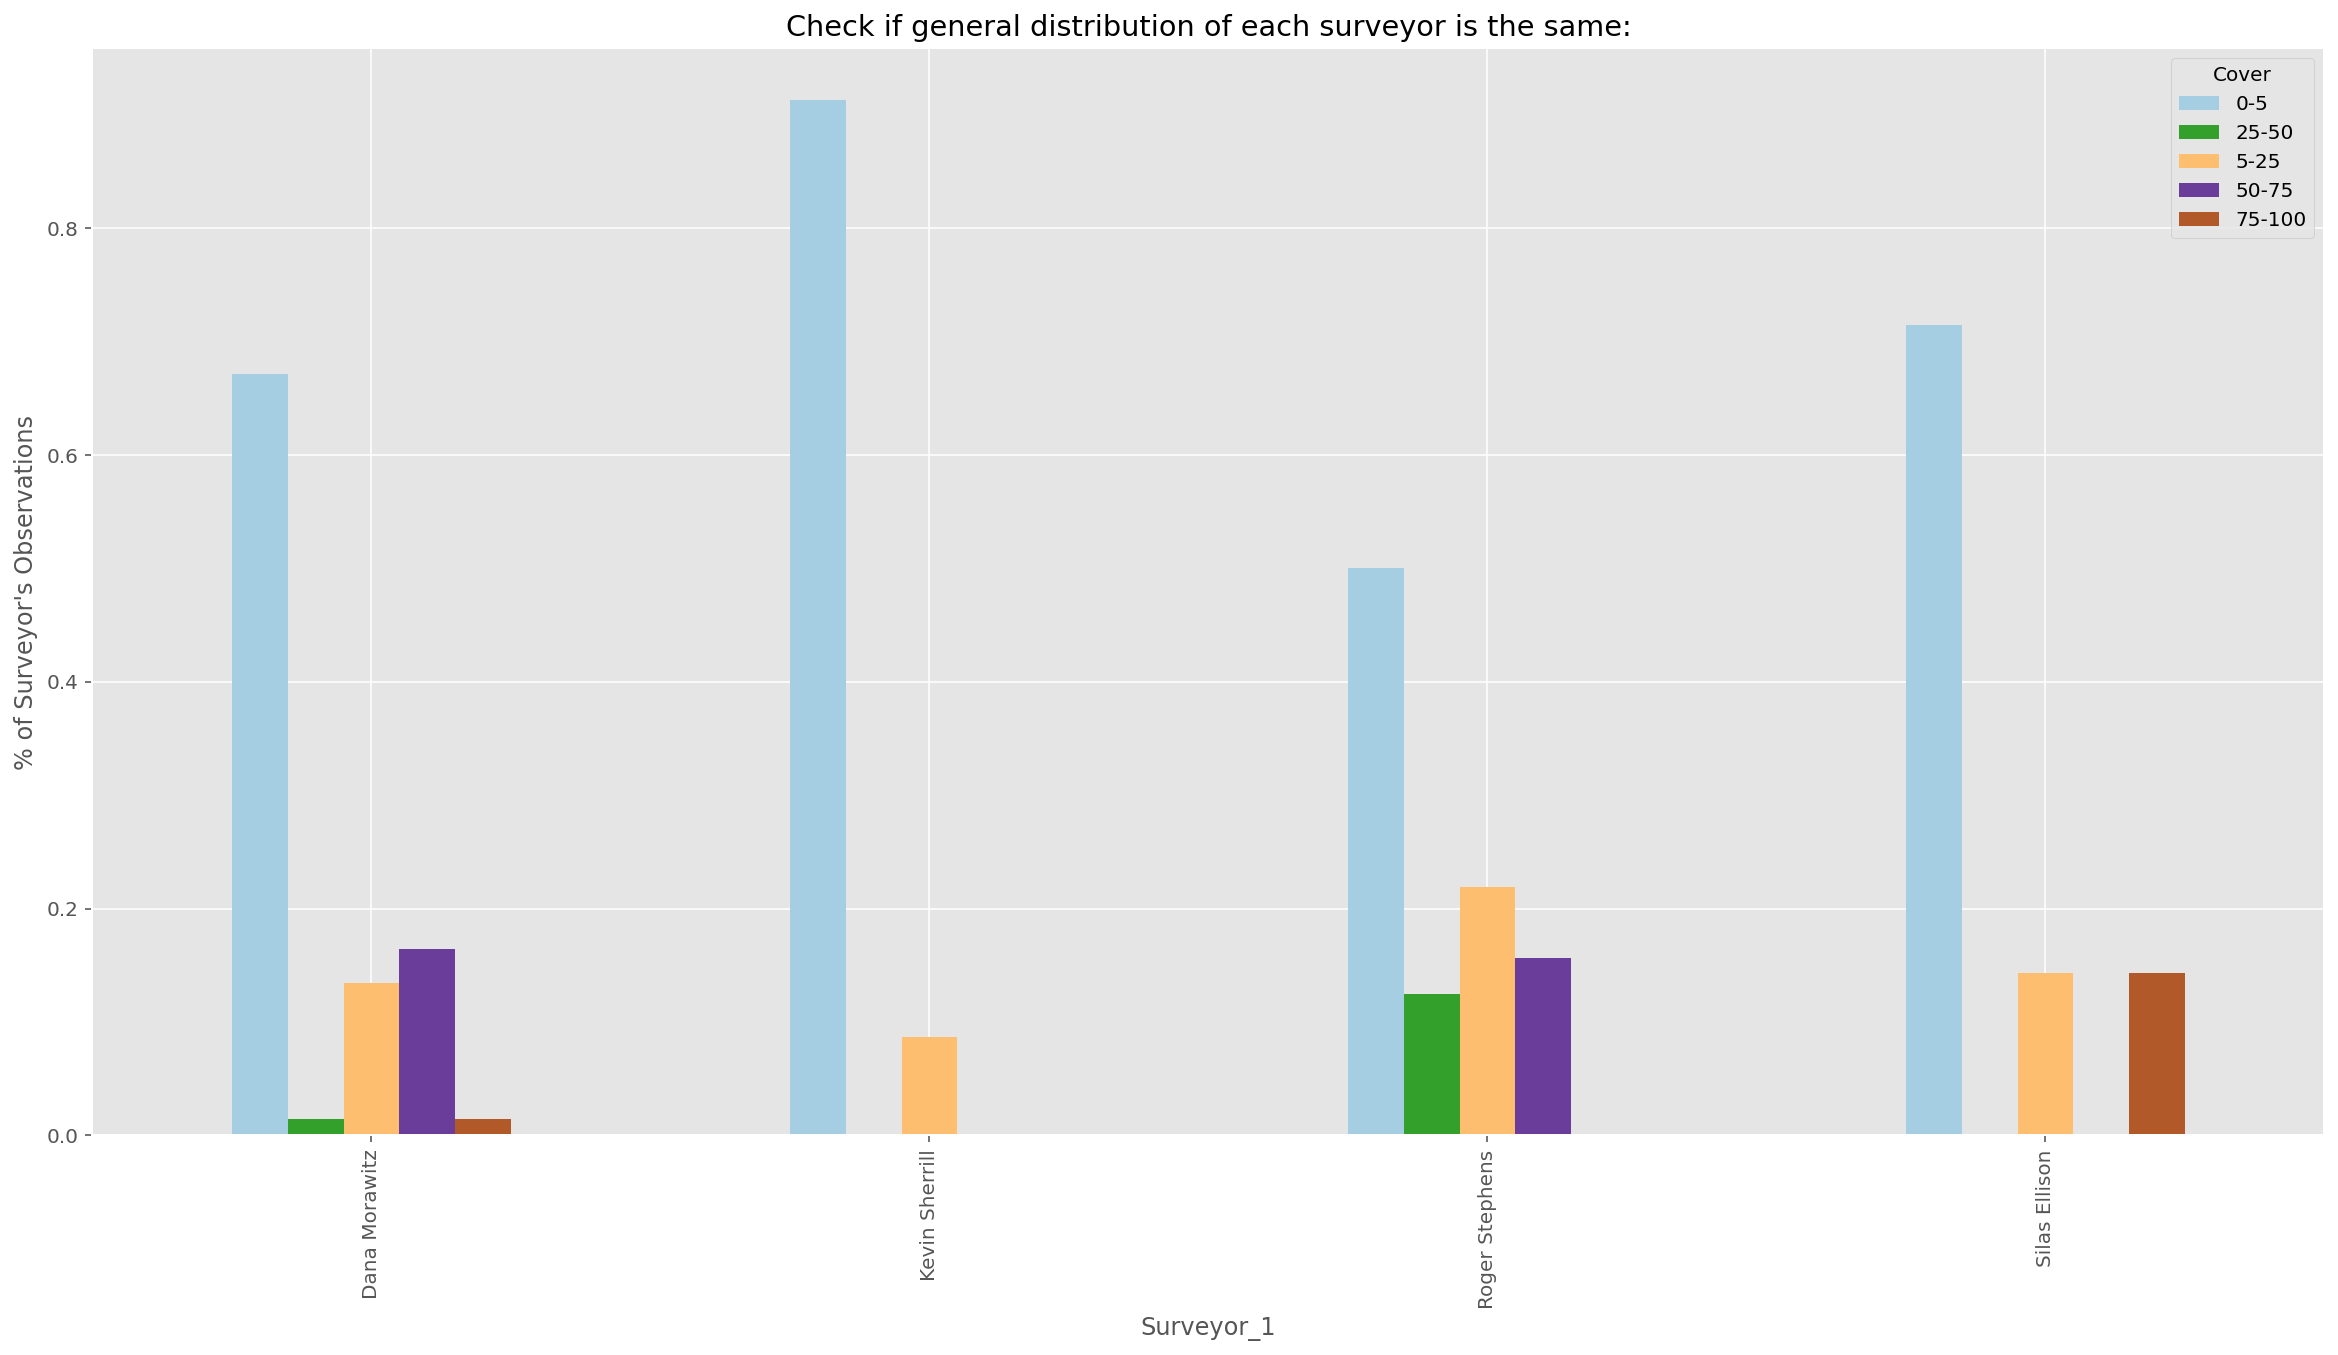

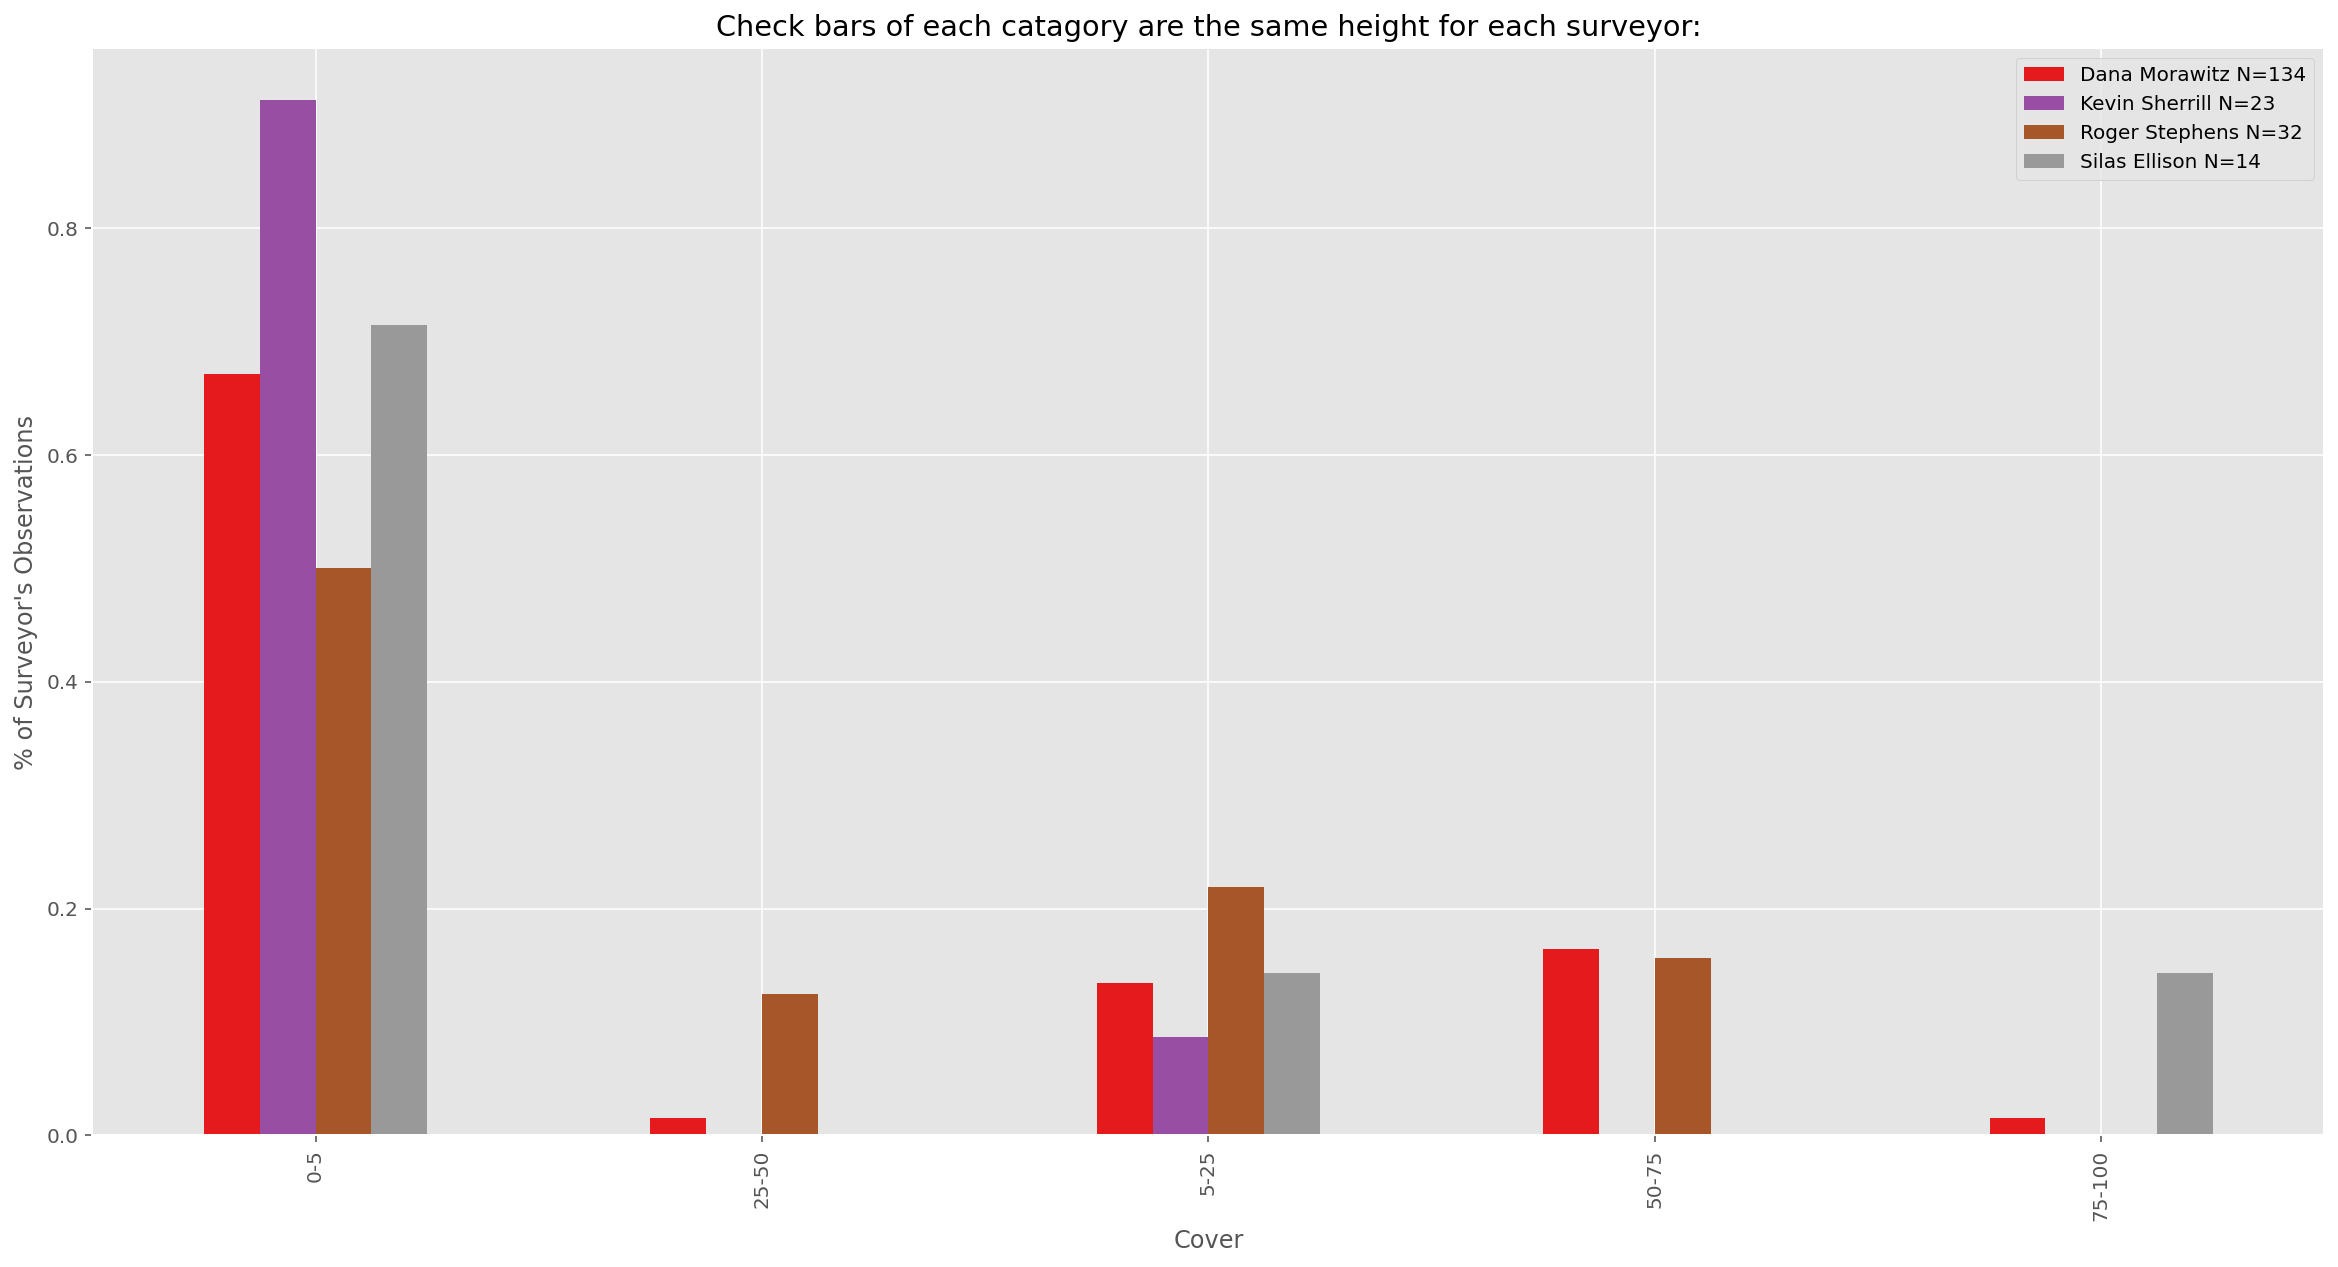

In [14]:
compare_surveyors(sub, 'Cover', 'Surveyor_1',drop=5)

In [15]:
QAQC_gps(sub,3)

GPS spatial error is above threshold in records below:


,Point_ID,Species_Sci,Cal_IPC_Rating,BHR_Site,Deprecated,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,SHAPE,Record_ID,Observation_Date,Surveyor_1,Surveyor_2,Phenology,Cover,Pop_Size,Patch_Shape,Int_Dist,Comments,Record_GlobalID,Field_Season,Estimated_Area_sqft
1058,3149,Dittrichia graveolens,Moderate,SAC,Active,OnePlus ONEPLUS A5010,NaN,3.425000,"{'x': 6189341.888407124, 'y': 2037981.49927579, 'spatialReference'...",2182,2021-08-23 19:50:30.000000000,Dana Morawitz,Michelle Conrad,Vegetative,0-5,101-200,Irregular,Heterogeneous,"Sparsely distributed on both sides of streambank, more dense on in...",d245ff66-44d3-49c7-85ff-1e8fc2d08321,Late Season,NaN
1066,3174,Dittrichia graveolens,Moderate,SAC,Active,iPhone X,NaN,5.000000,"{'x': 6184919.600784136, 'y': 2037387.207650864, 'spatialReference...",2050,2020-10-06 16:04:30.000000000,Roger Stephens,None,FloweringAdult,0-5,101-200,Irregular,Heterogeneous,Hand pulled. Point for sparse individuals around banks and in stream.,0626302e-edd1-4410-ac74-32faee633501,Late Season,350.0
1070,3178,Phalaris aquatica,Moderate,SAC,Active,iPhone X,NaN,5.000000,"{'x': 6190947.967583714, 'y': 2037422.6796691464, 'spatialReferenc...",2053,2020-10-07 18:20:44.000000000,Roger Stephens,None,Senescedwithseed,25-50,1-10,Circular,Homogeneous,Above rip rap next to SAC.,5086d7b0-8c7c-422d-8731-890d532034c9,Late Season,8.0
1071,3180,Bellardia trixago,None,SAC,Active,iPhone X,NaN,5.000000,"{'x': 6184943.058269444, 'y': 2037638.8744545951, 'spatialReferenc...",2056,2020-10-08 20:10:11.000000000,Roger Stephens,None,Senescedwithseed,0-5,1-10,Linear,Heterogeneous,Old skeletons. ID not 100% but gestalt looks likely. Return in spr...,35fd8a1b-29b8-4f3b-9c77-4580dde99cd7,Late Season,20.0
1074,3187,Mentha pulegium,Moderate,SAC,Active,"iPhone13,2",NaN,4.726851,"{'x': 6181911.653779854, 'y': 2036613.4694488111, 'spatialReferenc...",2063,2020-11-12 21:17:14.000000000,Mizael Seminatore,Roger Stephens,Senescedwithseed,5-25,51-100,Oval,Heterogeneous,Plants are mostly growing along the edge of a flood plain.,88687720-c105-4a8e-98f7-eb57d0a3c1e3,Late Season,NaN
1075,3188,Mentha pulegium,Moderate,SAC,Active,"iPhone13,2",NaN,4.761370,"{'x': 6181877.091533655, 'y': 2036606.788004664, 'spatialReference...",2064,2020-11-12 21:22:18.000000000,Mizael Seminatore,Roger Stephens,Senescedwithseed,5-25,1-10,Linear,Heterogeneous,Plants growing on seasonal wetland.,e0a3f134-5b05-4bc8-bafa-baf884add320,Late Season,7.0
1076,3189,Dittrichia graveolens,Moderate,SAC,Active,"iPhone13,2",NaN,4.563943,"{'x': 6181901.490784475, 'y': 2036658.686056006, 'spatialReference...",2065,2020-11-12 21:29:02.000000000,Mizael Seminatore,Roger Stephens,Senescedwithseed,5-25,1-10,Linear,Homogeneous,Single plant that has produced and dispersed its seeds. Plant is g...,a31022fd-358b-4b25-b689-0cc6b1370de0,Late Season,1.0
1077,3190,Dittrichia graveolens,Moderate,SAC,Active,iPhone 8,NaN,5.000000,"{'x': 6182154.4387722965, 'y': 2036412.186539274, 'spatialReferenc...",2067,2020-11-12 19:20:19.000000000,Silas Ellison,Mizael Seminatore,FruitingAdult,0-5,1-10,Linear,Homogeneous,"In channel of Indian Creek, just a couple of individuals, flowerin...",0ce77c1a-a18b-45d0-932b-035dff8f947c,Late Season,6.0
1078,3191,Mentha pulegium,Moderate,SAC,Active,iPhone 8,NaN,5.000000,"{'x': 6181972.557221373, 'y': 2036489.494797568, 'spatialReference...",2068,2020-11-12 19:56:54.000000000,Silas Ellison,Roger Stephens,Senescedwithseed,5-25,11-50,None,Heterogeneous,None,e35aa7c1-90a2-4350-b403-11e335eb2dc0,Late Season,NaN
1080,3193,Mentha pulegium,Moderate,SAC,Active,GNSS:84558,NaN,4.957372,"{'x': 6182021.00385516, 'y': 2036684.4257005304, 'spatialReference...",2070,2020-11-12 19:41:55.000000000,Kurt Lutz,Brian Creeks,Senescedwithseed,0-5,1-10,Linear,Homogeneous,5-6 individuals overhanging creek bed.,b788b947-c59c-48b4-8f44-22a82f865852,Late Season,25.0


In [16]:
QAQC_attachment_filenames(feature_service)


No attachments for layer/table Points


Found mislabeled photo attachement(s):
NNIP_Management
Object ID: 2  Current Name:  Photo 1.jpg


Object ID: 37  Current Name:  Photo 1.jpg


Object ID: 68  Current Name:  Photo 1.jpg
Object ID: 69  Current Name:  Photo 1.jpg
Object ID: 70  Current Name:  Photo 1.jpg


Object ID: 89  Current Name:  Photo 1.jpg


Object ID: 144  Current Name:  Photo 1.jpg


Object ID: 152  Current Name:  Photo 1.jpg


Object ID: 291  Current Name:  Photo 2.jpg
Object ID: 291  Current Name:  Photo 1.jpg
Object ID: 292  Current Name:  Photo 2.jpg
Object ID: 292  Current Name:  Photo 1.jpg
Object ID: 293  Current Name:  Photo 1.jpg


Object ID: 294  Current Name:  Photo 1.jpg
Object ID: 295  Current Name:  Photo 1.jpg
Object ID: 296  Current Name:  Photo 1.jpg


Object ID: 297  Current Name:  Photo 1.jpg


Object ID: 302  Current Name:  Photo 1.jpg


Object ID: 315  Current Name:  Photo 1.jpg


Object ID: 337  Current Name:  Photo 1.jpg
Object ID: 337  Current Name:  Photo 4.jpg
Object ID: 337  Current Name:  Photo 3.jpg


Object ID: 346  Current Name:  Photo 1.jpg
Object ID: 347  Current Name:  Photo 1.jpg


Object ID: 348  Current Name:  Photo 1.jpg
Object ID: 349  Current Name:  Photo 1.jpg


Object ID: 582  Current Name:  Photo 1.jpg


Object ID: 590  Current Name:  Photo 1.jpg


Object ID: 625  Current Name:  Photo 1.jpg


Object ID: 641  Current Name:  Photo 1.jpg


Object ID: 696  Current Name:  Photo 1.jpg


Object ID: 761  Current Name:  Photo 1.jpg


Object ID: 915  Current Name:  Photo 1.jpg


Object ID: 954  Current Name:  Photo 1.jpg


Object ID: 992  Current Name:  Photo 1.jpg


Object ID: 1046  Current Name:  Photo 1.jpg


Object ID: 1060  Current Name:  Photo 1.jpg


Object ID: 1088  Current Name:  Photo.jpg


Object ID: 1144  Current Name:  Photo 1.jpg


Object ID: 1213  Current Name:  Photo 1.jpg


Object ID: 1219  Current Name:  Photo 1.jpg


Object ID: 1225  Current Name:  Photo 1.jpg


Object ID: 1471  Current Name:  Photo 1.jpg
Object ID: 1472  Current Name:  Photo 1.jpg


Object ID: 1474  Current Name:  Photo 1.jpg


Object ID: 1475  Current Name:  Photo 1.jpg
Object ID: 1475  Current Name:  Photo 3.jpg
Object ID: 1475  Current Name:  Photo 2.jpg
Object ID: 1476  Current Name:  Photo 1.jpg
Object ID: 1477  Current Name:  Photo 1.jpg


Object ID: 1478  Current Name:  Photo 1.jpg
Object ID: 1478  Current Name:  Photo 2.jpg
Object ID: 1479  Current Name:  Photo 2.jpg
Object ID: 1479  Current Name:  Photo 1.jpg
Object ID: 1480  Current Name:  Photo 1.jpg


Object ID: 1481  Current Name:  Photo 1.jpg
Object ID: 1482  Current Name:  Photo 1.jpg


Object ID: 1483  Current Name:  Photo 1.jpg
Object ID: 1484  Current Name:  Photo 1.jpg
Object ID: 1484  Current Name:  Photo 3.jpg
Object ID: 1484  Current Name:  Photo 2.jpg
Object ID: 1484  Current Name:  Photo 4.jpg
Object ID: 1485  Current Name:  Photo 2.jpg
Object ID: 1485  Current Name:  Photo 1.jpg
Object ID: 1485  Current Name:  Photo 3.jpg


Object ID: 1486  Current Name:  Photo 1.jpg
Object ID: 1486  Current Name:  Photo 2.jpg


Object ID: 1728  Current Name:  Photo 1.jpg


Object ID: 1753  Current Name:  Photo 1.jpg


Object ID: 1791  Current Name:  Photo 1.jpg
Object ID: 1791  Current Name:  Photo 3.jpg
Object ID: 1791  Current Name:  Photo 2.jpg


Object ID: 1794  Current Name:  Photo 1.jpg


Object ID: 1808  Current Name:  Photo 1.jpg


Object ID: 1826  Current Name:  Photo 1.jpg


Object ID: 1834  Current Name:  Photo 2.jpg
Object ID: 1834  Current Name:  Photo 1.jpg


Object ID: 1934  Current Name:  Photo 1.jpg


Object ID: 1978  Current Name:  Photo 1.jpg


Object ID: 2021  Current Name:  Photo 1.jpg


Object ID: 2104  Current Name:  Photo 1.jpg


Object ID: 2106  Current Name:  Photo 1.jpg


Object ID: 2109  Current Name:  Photo 1.jpg


Object ID: 2116  Current Name:  Photo 1.jpg


Object ID: 2121  Current Name:  Photo 1.jpg


Object ID: 2166  Current Name:  Photo 1.jpg


Object ID: 2170  Current Name:  Photo 1.jpg


Object ID: 2186  Current Name:  Photo 1.jpg


Object ID: 2227  Current Name:  Photo 1.jpg
Object ID: 2228  Current Name:  Photo 1.jpg


Object ID: 2229  Current Name:  Photo 1.jpg


Object ID: 2293  Current Name:  Photo 1.jpg


Object ID: 2591  Current Name:  Photo 1.jpg


Object ID: 2689  Current Name:  Photo 1.jpg


Object ID: 2697  Current Name:  Photo 1.jpg


Object ID: 2704  Current Name:  Photo 1.jpg


Object ID: 2709  Current Name:  Photo 1.jpg


Object ID: 2717  Current Name:  Photo 1.jpg


Object ID: 2763  Current Name:  Photo 2.jpg
Object ID: 2764  Current Name:  Photo 1.jpg


Object ID: 2765  Current Name:  Photo 1.jpg
Object ID: 2766  Current Name:  Photo 1.jpg


Object ID: 2769  Current Name:  Photo 1.jpg
Object ID: 2771  Current Name:  Photo 1.jpg


Object ID: 2775  Current Name:  Photo 1.jpg


Object ID: 2797  Current Name:  Photo 1.jpg


Object ID: 2886  Current Name:  Photo 1.jpg


Object ID: 2888  Current Name:  Photo 1.jpg


Object ID: 2893  Current Name:  Photo 1.jpg


Object ID: 3037  Current Name:  Photo 2.jpg


Object ID: 3072  Current Name:  Photo 1.jpg
Object ID: 3073  Current Name:  Photo 1.jpg
Object ID: 3074  Current Name:  Photo 1.jpg


Object ID: 3075  Current Name:  Photo 1.jpg
Object ID: 3076  Current Name:  Photo 1.jpg


Object ID: 3077  Current Name:  Photo 1.jpg
Object ID: 3078  Current Name:  Photo 1.jpg


Object ID: 3079  Current Name:  Photo 1.jpg


Object ID: 3085  Current Name:  Photo 1.jpg


Object ID: 3139  Current Name:  Photo 1.jpg


Found mislabeled photo attachement(s):
NNIP_Mapping
Object ID: 994  Current Name:  Photo1.jpg
Object ID: 995  Current Name:  Photo1.jpg


Object ID: 996  Current Name:  Photo1.jpg
Object ID: 997  Current Name:  Photo1.jpg
Object ID: 998  Current Name:  Photo1.jpg
Object ID: 998  Current Name:  Photo2.jpg
Object ID: 998  Current Name:  Photo3.jpg


Object ID: 999  Current Name:  Photo1.jpg
Object ID: 1000  Current Name:  Photo1.jpg
Object ID: 1001  Current Name:  Photo1.jpg


Object ID: 1002  Current Name:  Photo1.jpg
Object ID: 1002  Current Name:  Photo2.jpg


Object ID: 1010  Current Name:  Photo1.jpg


Object ID: 1080  Current Name:  Photo1.jpg


Object ID: 1518  Current Name:  Photo 1.jpg
Object ID: 1519  Current Name:  Photo 1.jpg


Object ID: 1525  Current Name:  Photo 1.jpg


Object ID: 1551  Current Name:  Photo 1.jpg


Object ID: 1590  Current Name:  Photo 3.jpg


Object ID: 1725  Current Name:  Photo 1.jpg


Object ID: 1774  Current Name:  Photo 1.jpg


Object ID: 2003  Current Name:  Photo 1.jpg


Object ID: 2085  Current Name:  Photo 1.jpg


Object ID: 2100  Current Name:  Photo 1.jpg


Object ID: 2103  Current Name:  Photo 1.jpg


Object ID: 2122  Current Name:  Photo 1.jpg


Object ID: 2208  Current Name:  Photo 1.jpg


Object ID: 2281  Current Name:  Photo 1.jpg


Object ID: 2289  Current Name:  Photo 1.jpg
Object ID: 2290  Current Name:  Photo 1.jpg


Object ID: 2293  Current Name:  Photo 1.jpg



No mislabeled photos found for layer/table NNIP_Monitoring



No attachments for layer/table NNIP_Monitoring_Observations


# Export Excel Data Deliverable

In [17]:
data.columns

Index(['Point_ID', 'Species_Sci', 'Cal_IPC_Rating', 'BHR_Site', 'Deprecated',
       'ESRIGNSS_RECEIVER', 'ESRIGNSS_H_RMS', 'ESRIGNSS_AVG_H_RMS', 'SHAPE',
       'Record_ID', 'Observation_Date', 'Surveyor_1', 'Surveyor_2',
       'Phenology', 'Cover', 'Pop_Size', 'Patch_Shape', 'Int_Dist', 'Comments',
       'Record_GlobalID', 'Field_Season', 'Estimated_Area_sqft'],
      dtype='object')

In [18]:
field_order = ['BHR_Site',
 'Observation_Date',
 'Surveyor_1', 
 'Surveyor_2', 
 'Field_Season',
 'Species_Sci',
  'Phenology',
 'Cover',
 'Pop_Size',
 'Estimated_Area_sqft',
 'Patch_Shape', 
 'Int_Dist',
 'Comments',
 'Point_ID',
 'Record_ID', 
 'Record_GlobalID', 
 'Cal_IPC_Rating',
 'Deprecated',
 'ESRIGNSS_RECEIVER',
 'ESRIGNSS_H_RMS', 
 'ESRIGNSS_AVG_H_RMS', 
 'SHAPE']

In [19]:
export_data_deliverable(data, feature_service, field_order,file_name='SAC_NNIP_Mapping' )

Exported to Outputs/SAC_NNIP_Mapping_Data_20211214.xlsx
